In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [30]:
df=pd.read_excel("Downloads/Customer_Churn_Data_Large.xlsx")

In [7]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel
0,1,62,M,Single,Low
1,2,65,M,Married,Low
2,3,18,M,Single,Low
3,4,21,M,Widowed,Low
4,5,21,M,Divorced,Medium


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1000 non-null   int64 
 1   Age            1000 non-null   int64 
 2   Gender         1000 non-null   object
 3   MaritalStatus  1000 non-null   object
 4   IncomeLevel    1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [9]:
df.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,500.500000,43.267000
std,288.819436,15.242311
min,1.000000,18.000000
25%,250.750000,30.000000
50%,500.500000,43.000000
75%,750.250000,56.000000
max,1000.000000,69.000000


In [15]:
df.columns


Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')

In [16]:
df.shape

(1000, 5)

In [5]:
df.isnull().sum()

CustomerID       0
Age              0
Gender           0
MaritalStatus    0
IncomeLevel      0
dtype: int64

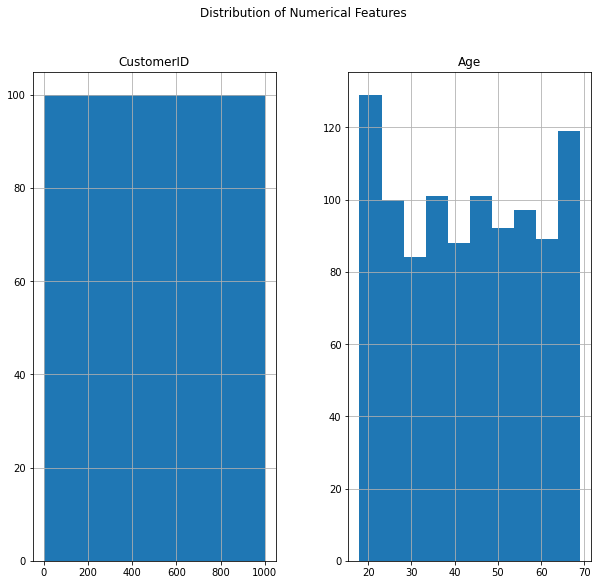

In [24]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

df[numeric_cols].hist(figsize=(10, 9))
plt.suptitle("Distribution of Numerical Features")
plt.show()



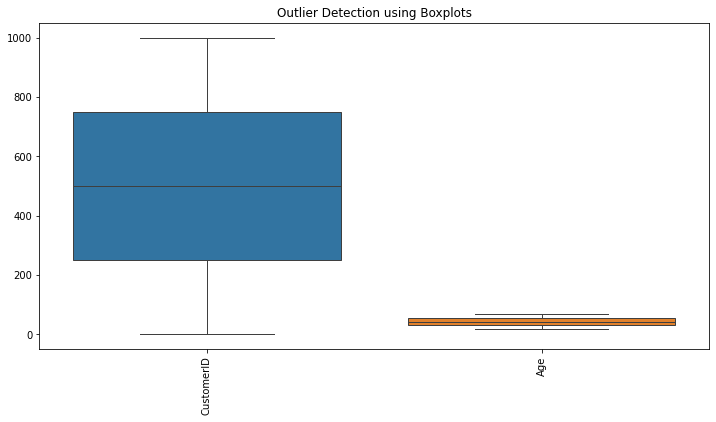

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Detection using Boxplots")
plt.show()


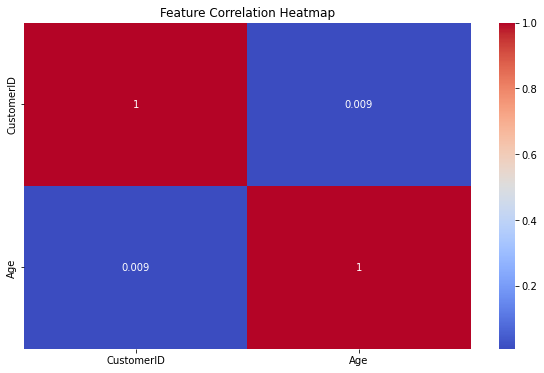

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [31]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.clip(df[col], lower, upper)


In [38]:
categorical_cols = df.select_dtypes(include=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)
